# Course: Deep Learning
# Author: Sandro Camargo sandrocamargo@unipampa.edu.br
# MNIST Classification
# Dataset: '/content/sample_data/' mnist
# Dataset description: https://www.tensorflow.org/datasets/catalog/mnist


Loading libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Defining image parameters

In [ ]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

Loading dataset from google colab

In [ ]:
data_path = "/content/sample_data/"
train_data = np.loadtxt(data_path + "mnist_train_small.csv", delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", delimiter=",") 

Scaling the inputs in [0,1] range and presenting the input and output dataset dimensions

In [ ]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01

Splitting inputs and outputs
Binarizing outputs


In [ ]:
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])
print('The training dataset (input) dimensions are: ', train_imgs.shape)
print('The training dataset (output) dimensions are: ', train_labels.shape)
print('The testing dataset (input) dimensions are: ', test_imgs.shape)
print('The testing dataset (output) dimensions are: ',test_labels.shape)

train_labels_bin = label_binarize(train_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The training dataset (input) dimensions are:  (20000, 784)
The training dataset (output) dimensions are:  (20000, 1)
The testing dataset (input) dimensions are:  (10000, 784)
The testing dataset (output) dimensions are:  (10000, 1)


Inspecting the training set

Showing the first 20 samples and their labels

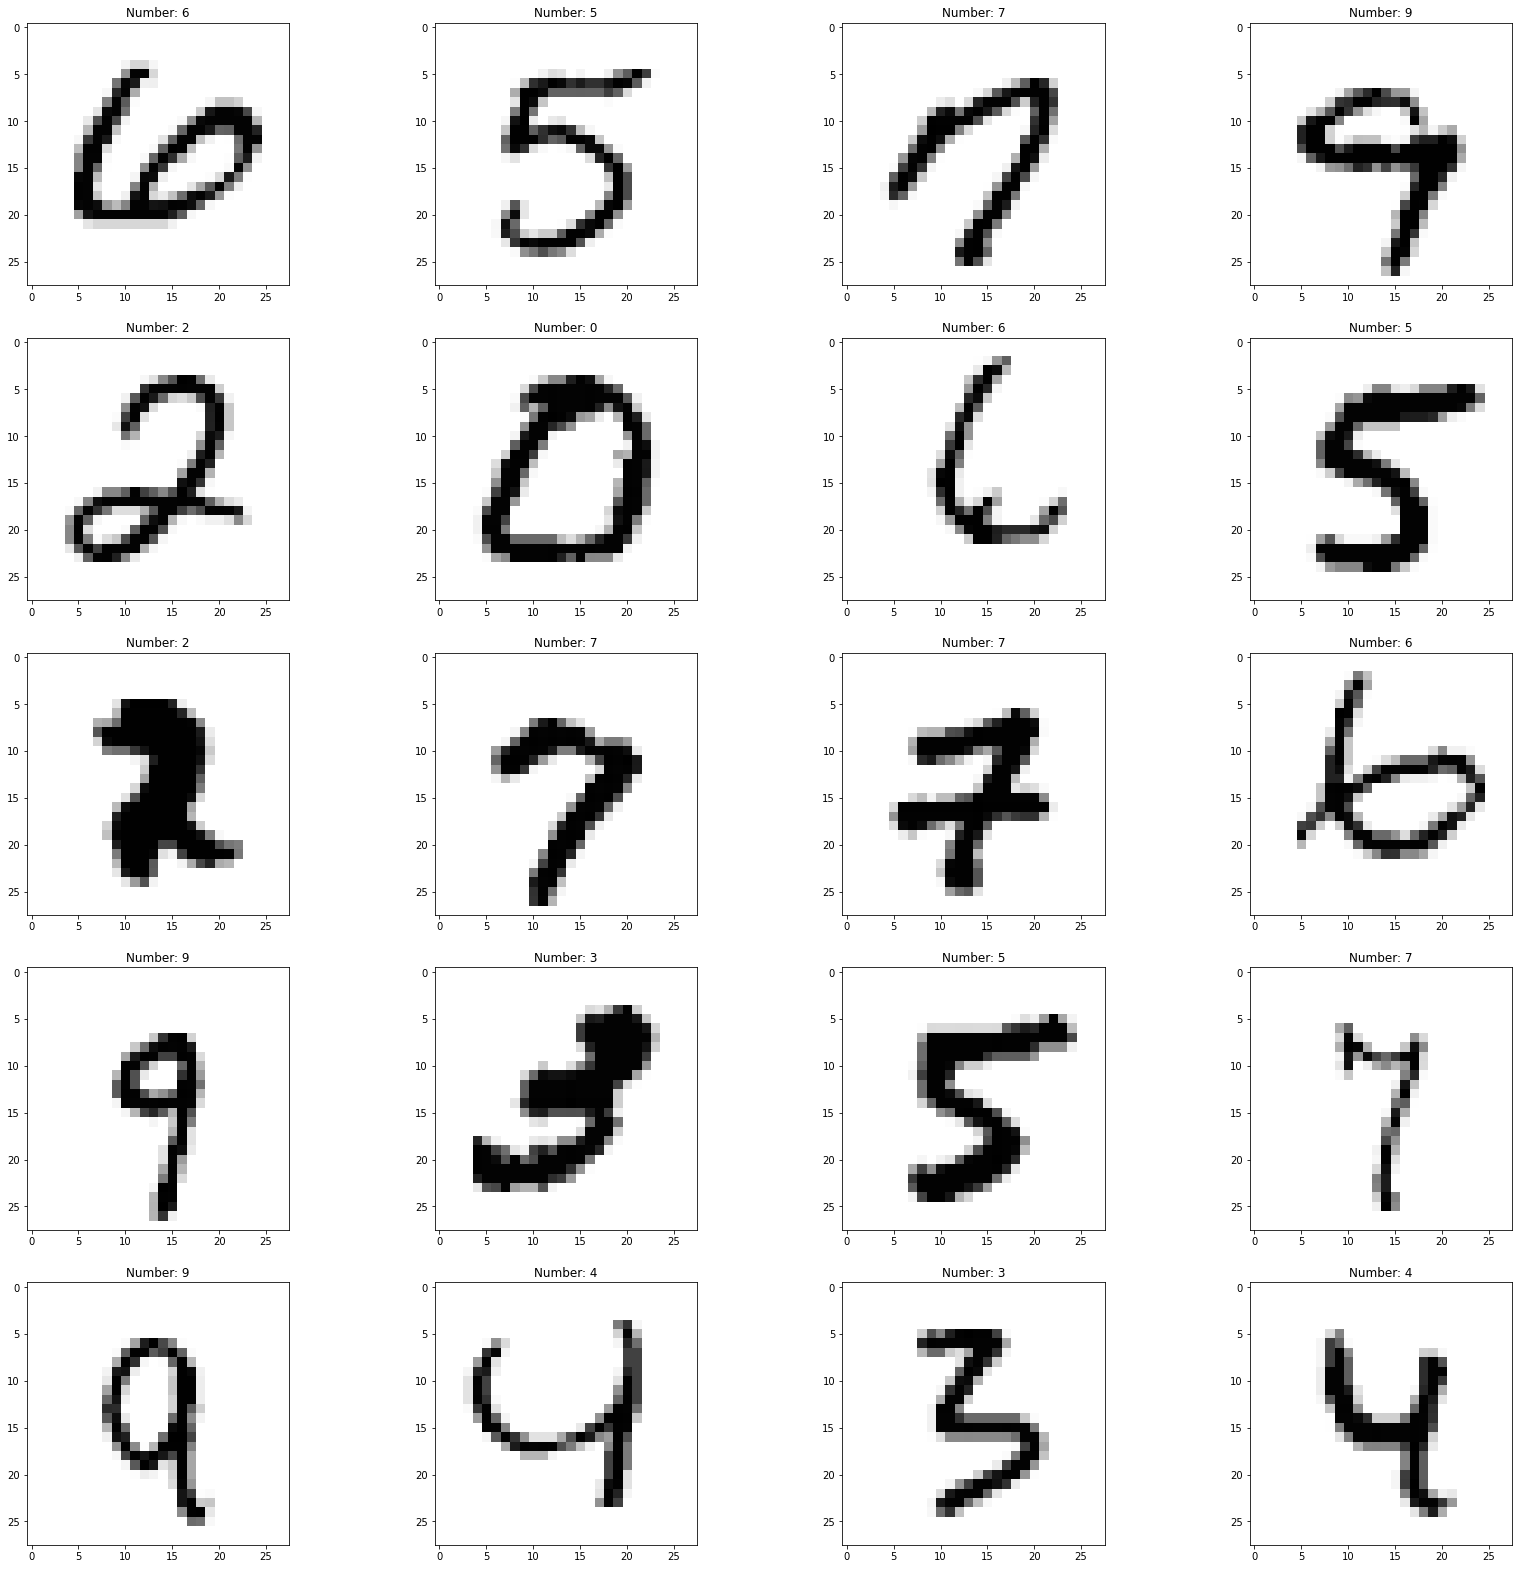

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(28, 28))

for i in range(5):
  for j in range(4):
    img = train_data[i*5+j,range(1,785)].reshape((28,28))
    ax[i,j].imshow(img, cmap="Greys")
    ax[i,j].title.set_text("Number: " + str(int(train_data[i*5+j,0])))
plt.show()

Creating and training the model


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=[image_pixels]),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

history = model.fit(
    train_imgs, train_labels_bin, 
    epochs=50, verbose=1,
    validation_split=0.2
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
500/500 [==============================] - 2s 3ms/step - loss: 0.4390 - categorical_accuracy: 0.8770 - val_loss: 0.2697 - val_categorical_accuracy: 0.9243
Epoch 2/50
500/500 [==============================] - 2s 3ms/step - loss: 0.2129 - categorical_accuracy: 0.9377 - val_loss: 0.1960 - val_categoric

Plotting the loss function on training and validation set.

The best value for epochs is when the validation loss starts to increase.

---



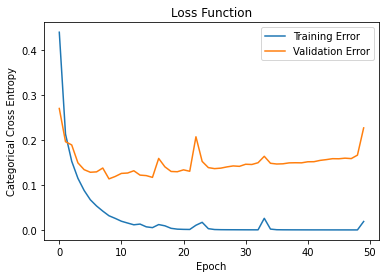

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Function')
plt.ylabel('Categorical Cross Entropy')
plt.xlabel('Epoch')
plt.legend(['Training Error','Validation Error'], loc='upper right')
plt.savefig("trainingerror.pdf")
plt.show()

Plotting the classification accuracy on training and validation sets

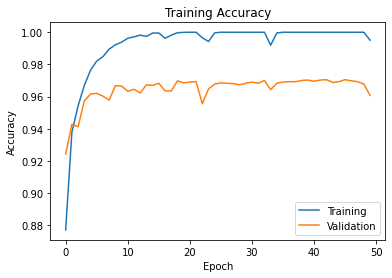

In [ ]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'], loc='lower right')
plt.savefig("trainingaccuracy.pdf")
plt.show()

Evaluates performance on test set
Presents the classification accuracy

In [ ]:
scores = model.evaluate(
    test_imgs, test_labels_bin, verbose=1
)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.2113 - categorical_accuracy: 0.9624
categorical_accuracy: 96.24%


Summarizing the performance on training set


In [ ]:
test_predictions = model.predict(test_imgs)
print(confusion_matrix(test_predictions.argmax(axis=1), test_labels_bin.argmax(axis=1)))
print(classification_report(test_predictions.argmax(axis=1), test_labels_bin.argmax(axis=1), target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))

313/313 [==============================] - 1s 2ms/step
[[ 957    0    3    0    0    6    6    0    0    1]
 [   0 1115    1    1    0    0    3    3    1    3]
 [   4    6 1006   10    3    3    2   15    5    2]
 [   3    1    8  974    5   30    2   10   13   12]
 [   1    0    1    0  933    2    4    7    6    8]
 [   3    0    0    4    0  836    1    0    2    2]
 [   3    3    3    0   12    7  940    0    6    3]
 [   0    2    3    2    2    0    0  961    5    2]
 [   4    7    6   13    1    5    0    2  927    1]
 [   5    1    1    6   26    3    0   30    9  975]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       973
           1       0.98      0.99      0.99      1127
           2       0.97      0.95      0.96      1056
           3       0.96      0.92      0.94      1058
           4       0.95      0.97      0.96       962
           5       0.94      0.99      0.96       848
           6       0.98      0.96  

Confusion Matrix Heatmap

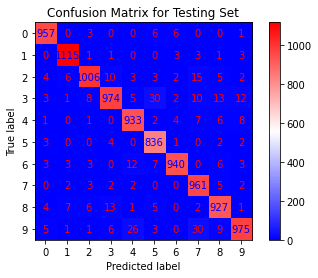

In [ ]:
cm = confusion_matrix(test_predictions.argmax(axis=1), test_labels_bin.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
disp.plot(cmap="bwr")
plt.title('Confusion Matrix for Testing Set')
plt.savefig("confusionmatrix.pdf")
plt.show()

Reporting some misclassified samples 

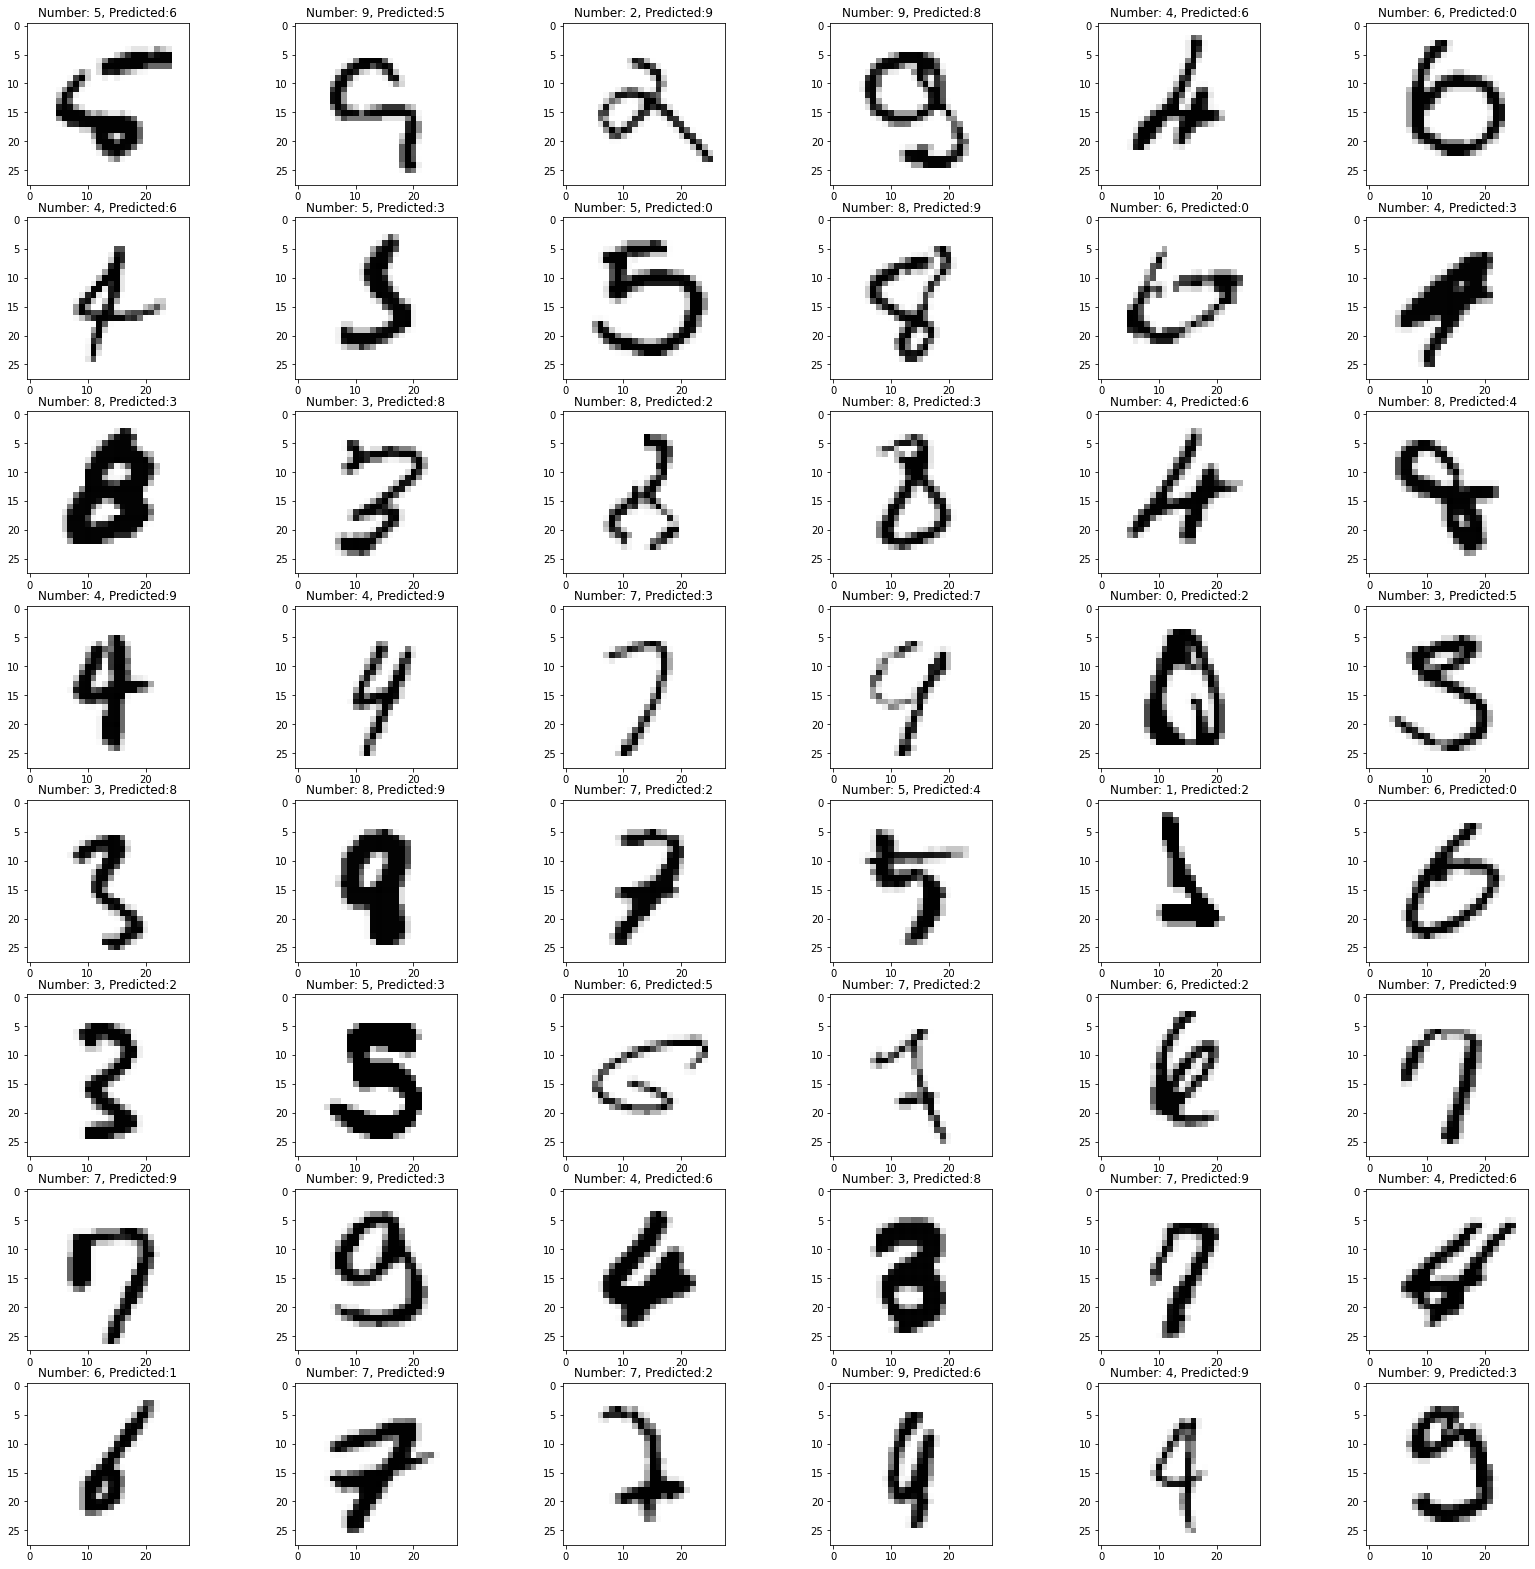

In [ ]:
i = 0
j = -1

fig, ax = plt.subplots(nrows=8, ncols=6, figsize=(28, 28))

for k in range(5000):
  if test_predictions.argmax(axis=1)[k]!=test_labels_bin.argmax(axis=1)[k]:
      if i==8:
         break
      j = j + 1
      img = test_data[k,range(1,785)].reshape((28,28))
      ax[i,j].imshow(img, cmap="Greys")
      ax[i,j].title.set_text("Number: " + str(int(test_data[k,0])) + ", Predicted:" + str(test_predictions.argmax(axis=1)[k]))
      if j>4:
         j = -1
         i = i + 1
plt.show()